# Deep Learning - Derin Öğrenme - ANN - Artificial Neural Network

### Deep Learning ile Makine Öğrenmesi (1-Classification 2-Regression 3-Clustering)

1- Classification

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df=pd.read_csv("pima-indians-diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] #Hedefimiz şeker hastası olup olmadıklarını tespit edebilmek

In [9]:
y=df[['Outcome']] #Hedefimiz şeker hastası olup olmadıklarını tespit edebilmek

In [10]:
#ya da
#x=df.iloc[:,0:8] #ilk 8 sütunu al 8 dahil değil
#y=df.iloc[:,8] #8i al.

In [11]:
x.shape

(768, 8)

In [12]:
model=Sequential()

In [13]:
model.add(Dense(8,activation="relu")) # Dense layer tüm layerlarda bulun demek, ilkine 8 koyuyoruz çünkü 8 sütun var. activation koduna relu diyoruz. birinin çıktısı diğerinin girdiği oluyor
model.add(Dense(12,activation="relu")) 
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))#classificaion olduğu için sonuç evet veya hayır olacak o yüzden 1 koyuyoruz.
#nöron sayısını arttırmak başarıyı arttıtrıyor
#birden fazla layer varsa reLU kullanıyoruz aralarda
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy") #optimizer ; eğer öğrenme hızı düşükse hızlandırıyor, hızlıysa ortalamaya getiritor ayarlıyor. 

In [14]:
model.fit(x,y,epochs=1500,batch_size=10,verbose=1) #nöronlar araası gidip gelme işlemine epoch diyoruz. kaç def gidip geleceğini belirtiyoruz.
#batch_size -> derin öğrenmede veriler çok fazla olduğu için bir seferde 10 veriyi alıyoruz
#verbose -> bazen makineler 1 hafta çalışıyor, acaba tıkandı mı ram hatası mı verdi, çalışışyor mu dondur mu vbilmediğimiz için verbose=1 yazıyoruz bunu sonucu görmek istiyoruz. 
#her seferinde rakamları yazsın diye kaçıncı epoch'da gibi

Epoch 1/1500
77/77 [==============================] - 1s 2ms/step - loss: 0.7727 - accuracy: 0.6419
Epoch 2/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6510
Epoch 3/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6510
Epoch 4/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6510
Epoch 5/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6510
Epoch 6/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6510
Epoch 7/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6510
Epoch 8/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6510
Epoch 9/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6510
Epoch 10/1500
77/77 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6510

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [16]:
scores=model.evaluate(x,y)

24/24 [==============================] - 1s 3ms/step - loss: 0.3931 - accuracy: 0.8229


In [17]:
scores[0] # hata - loss 

0.39310720562934875

In [18]:
scores[1] # başarı -accuracy

0.8229166865348816

In [19]:
#Early stopping # örneğin 150 doğru sayısı olmayabilir, eğer geriye düşmeye başlamışsa durmamız gerektiğiniz anlıyoruz. accuraacy ile val_accuracy'inin neredeyse eşitlendiği yer bizim aslında durmamız için yeterli epochs sayısı oluyor.

In [20]:
history=model.fit(x,y,epochs=150,validation_split=0.20,batch_size=10,verbose=1) # %20 test için %80 eğitim için kullan diyoruz. 
#derste hoca ---19--- olarak güncelledi.

Epoch 1/150
62/62 [==============================] - 1s 18ms/step - loss: 0.4046 - accuracy: 0.8176 - val_loss: 0.4172 - val_accuracy: 0.7662
Epoch 2/150
62/62 [==============================] - 1s 8ms/step - loss: 0.4112 - accuracy: 0.8127 - val_loss: 0.3748 - val_accuracy: 0.8182
Epoch 3/150
62/62 [==============================] - 0s 7ms/step - loss: 0.3956 - accuracy: 0.8143 - val_loss: 0.3922 - val_accuracy: 0.8182
Epoch 4/150
62/62 [==============================] - 0s 7ms/step - loss: 0.4144 - accuracy: 0.8046 - val_loss: 0.3892 - val_accuracy: 0.7987
Epoch 5/150
62/62 [==============================] - 0s 7ms/step - loss: 0.4058 - accuracy: 0.8094 - val_loss: 0.3902 - val_accuracy: 0.7987
Epoch 6/150
62/62 [==============================] - 0s 7ms/step - loss: 0.4022 - accuracy: 0.8111 - val_loss: 0.3690 - val_accuracy: 0.8442
Epoch 7/150
62/62 [==============================] - 0s 6ms/step - loss: 0.3984 - accuracy: 0.8241 - val_loss: 0.4105 - val_accuracy: 0.7792
Epoch 8/150


In [21]:
import matplotlib.pyplot as plt

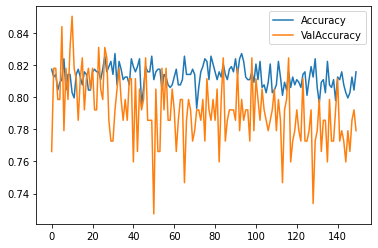

In [22]:
#validation_split ile ayırdığımız veri, val_accuracy test verisi
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="ValAccuracy")
plt.legend()

In [23]:
# resimle çalışıyorsanız giriş ve çıkışın aynı olması lazım.
# belirli bir hiyerarşi var, aralarda kaç layer olmasıyla ilgili. pub.towardai.net sitesinde bunula ilgili bir makale var. 
#https://pub.towardsai.net/main-types-of-neural-networks-and-its-applications-tutorial-734480d7ec8e    #hangi durumda ne kadar nöron koymamız gerektiğiyle ilgili

In [24]:
# layer sayısını arttırmak nöron sayısını arttırmak  başarı sonucunu arttırır ama bilgisayarınızın kaldırabilmesi lazım.

#### Regression

In [51]:
import pandas as pd
pd.set_option("display.max_columns",100) #kolonları görebilmek için 100'e çıkardık.

In [52]:
df=pd.read_pickle("kc_house.pkl")

In [53]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,condition,sqft_above,price,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,3,1180,221900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,3,2170,538000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,3,770,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,5,1050,604000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,3,1680,510000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 19034, dtype: float64

In [55]:
x=df.drop("price",axis=1) #price'ı kaldır
y=df[["price"]]


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model=Sequential()
model.add(Dense(81,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(42,activation="relu"))
model.add(Dense(21,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [58]:
model.fit(x,y,validation_split=0.20, batch_size=128,epochs=25)

Epoch 1/25
119/119 [==============================] - 2s 6ms/step - loss: 190515527680.0000 - val_loss: 40021094400.0000
Epoch 2/25
119/119 [==============================] - 0s 4ms/step - loss: 32852402176.0000 - val_loss: 34112989184.0000
Epoch 3/25
119/119 [==============================] - 0s 4ms/step - loss: 32153493504.0000 - val_loss: 33580740608.0000
Epoch 4/25
119/119 [==============================] - 0s 4ms/step - loss: 31710636032.0000 - val_loss: 32744656896.0000
Epoch 5/25
119/119 [==============================] - 1s 5ms/step - loss: 31067174912.0000 - val_loss: 32155326464.0000
Epoch 6/25
119/119 [==============================] - 1s 4ms/step - loss: 30424238080.0000 - val_loss: 31724640256.0000
Epoch 7/25
119/119 [==============================] - 1s 4ms/step - loss: 29771689984.0000 - val_loss: 30751049728.0000
Epoch 8/25
119/119 [==============================] - 1s 4ms/step - loss: 29159737344.0000 - val_loss: 30313906176.0000
Epoch 9/25
119/119 [===================

In [59]:
loss_df=pd.DataFrame(model.history.history) # dataframe dönüştürdük ki hataları görebilelim

<AxesSubplot: >

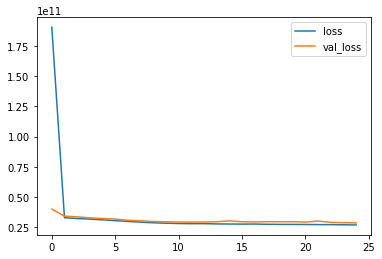

In [61]:
loss_df.plot()

In [45]:
tahmin=model.predict(x)

595/595 [==============================] - 1s 2ms/step


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
r2_score(tahmin,y) #r2 0.80 üzeri olması lazım

-0.49755300829014004

In [65]:
(mean_squared_error(tahmin,y))**0.5 # hatanın 100bin altında olması lazım

165395.04346365607

In [66]:
#verileri değiştiriyoruz
model=Sequential()
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.fit(x,y,validation_split=0.20, batch_size=128,epochs=25) #uzun sürmesin diye epoch yükseltmedik yoksa 1500 yapsaydık

Epoch 1/25
119/119 [==============================] - 2s 7ms/step - loss: 261877219328.0000 - val_loss: 213746532352.0000
Epoch 2/25
119/119 [==============================] - 0s 4ms/step - loss: 63320907776.0000 - val_loss: 34179479552.0000
Epoch 3/25
119/119 [==============================] - 0s 4ms/step - loss: 32374173696.0000 - val_loss: 33774374912.0000
Epoch 4/25
119/119 [==============================] - 0s 4ms/step - loss: 32121583616.0000 - val_loss: 33568432128.0000
Epoch 5/25
119/119 [==============================] - 0s 4ms/step - loss: 31825487872.0000 - val_loss: 33125984256.0000
Epoch 6/25
119/119 [==============================] - 0s 4ms/step - loss: 31536857088.0000 - val_loss: 32793708544.0000
Epoch 7/25
119/119 [==============================] - 0s 4ms/step - loss: 31253168128.0000 - val_loss: 32449845248.0000
Epoch 8/25
119/119 [==============================] - 1s 4ms/step - loss: 30961405952.0000 - val_loss: 32226013184.0000
Epoch 9/25
119/119 [==================

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [68]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=1500) #datayı split etmek yerine kendimiz verdik.

Epoch 1/1500
119/119 [==============================] - 0s 4ms/step - loss: 27894794240.0000 - val_loss: 28502312960.0000
Epoch 2/1500
119/119 [==============================] - 0s 3ms/step - loss: 27913105408.0000 - val_loss: 28455084032.0000
Epoch 3/1500
119/119 [==============================] - 0s 4ms/step - loss: 27809843200.0000 - val_loss: 28397062144.0000
Epoch 4/1500
119/119 [==============================] - 0s 4ms/step - loss: 27847088128.0000 - val_loss: 28377376768.0000
Epoch 5/1500
119/119 [==============================] - 1s 7ms/step - loss: 27754788864.0000 - val_loss: 28342175744.0000
Epoch 6/1500
119/119 [==============================] - 1s 6ms/step - loss: 27722493952.0000 - val_loss: 28286560256.0000
Epoch 7/1500
119/119 [==============================] - 1s 6ms/step - loss: 27647784960.0000 - val_loss: 28278726656.0000
Epoch 8/1500
119/119 [==============================] - 1s 6ms/step - loss: 27645542400.0000 - val_loss: 28209565696.0000
Epoch 9/1500
119/119 [==

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 19)                1558      
                                                                 
 dense_17 (Dense)            (None, 19)                380       
                                                                 
 dense_18 (Dense)            (None, 19)                380       
                                                                 
 dense_19 (Dense)            (None, 19)                380       
                                                                 
 dense_20 (Dense)            (None, 19)                380       
                                                                 
 dense_21 (Dense)            (None, 1)                 20        
                                                                 
Total params: 3,098
Trainable params: 3,098
Non-traina